/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/besuperst/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53

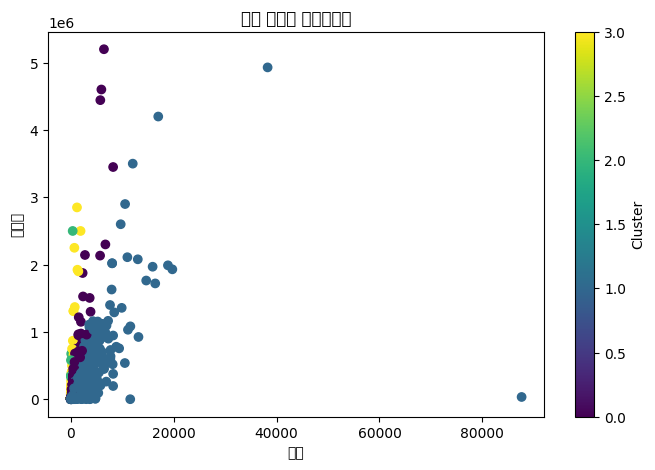

          count         mean          std          min          25%  \
cluster                                                               
0        1306.0   471.789867   144.286539   309.032167   363.784777   
1        2299.0   147.902788    87.454283     0.043978    70.643939   
2           6.0  7507.134573  2223.001357  5660.377358  6233.186412   
3         199.0  1447.128465   528.553820   960.000000  1095.554978   

                 50%          75%           max  
cluster                                          
0         434.203386   532.984882    952.380952  
1         145.666424   223.821931    308.641975  
2        6563.959238  8039.676909  11600.000000  
3        1270.266820  1539.103342   4038.461538  


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv('공장매매가_25년.csv')

# 2. 문자열 → 숫자형 변환 (쉼표, 공백 등 제거)
df['매매가'] = pd.to_numeric(df['Unnamed: 10'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
df['면적'] = pd.to_numeric(df['Unnamed: 8'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# 3. 결측치 제거
df = df.dropna(subset=['매매가', '면적'])

# 4. 면적대비 매매가 계산
df['면적대비매매가'] = df['매매가'] / df['면적']

# 5. 클러스터링
X = df[['면적대비매매가']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# 6. 결과 시각화
plt.figure(figsize=(8,5))
plt.scatter(df['면적'], df['매매가'], c=df['cluster'], cmap='viridis')
plt.xlabel('면적')
plt.ylabel('매매가')
plt.title('공장 매매가 클러스터링')
plt.colorbar(label='Cluster')
plt.show()

# 7. 각 클러스터별 통계 확인
print(df.groupby('cluster')['면적대비매매가'].describe())

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px

# 1. 데이터 불러오기
df = pd.read_csv('공장매매가_25년.csv')

# 2. 문자열 → 숫자형 변환 (쉼표, 공백 등 제거)
df['매매가'] = pd.to_numeric(df['Unnamed: 10'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
df['면적'] = pd.to_numeric(df['Unnamed: 8'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# 3. 결측치 제거
df = df.dropna(subset=['매매가', '면적'])

# 4. 면적대비 매매가 계산
df['면적대비매매가'] = df['매매가'] / df['면적']

# 5. 클러스터링
X = df[['면적대비매매가']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# 6. Plotly로 interactive 산점도 (행번호 포함)
fig = px.scatter(
    df,
    x='면적',
    y='매매가',
    color='cluster',
    hover_data={
        'index': df.index,  # 행번호 추가
        '면적': True,
        '매매가': True,
        '면적대비매매가': True,
        'cluster': True
    },
    title='공장 매매가 클러스터링 (interactive)'
)
fig.update_layout(width=800, height=500)
fig.show()

# 7. HTML로 저장 (원하면 아래 코드 사용)
# fig.write_html("공장매매가_클러스터링.html")

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px

# 1. 데이터 불러오기
df = pd.read_csv('공장매매가_25년.csv')

# 2. 문자열 → 숫자형 변환 (쉼표, 공백 등 제거)
df['매매가'] = pd.to_numeric(df['Unnamed: 10'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
df['면적'] = pd.to_numeric(df['Unnamed: 8'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# 3. 결측치 제거
df = df.dropna(subset=['매매가', '면적'])

# 4. 면적대비 매매가 계산
df['면적대비매매가'] = df['매매가'] / df['면적']

# 5. 클러스터링 (면적대비매매가 기준)
X = df[['면적대비매매가']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# 6. Plotly로 interactive 산점도 (행번호 포함)
fig = px.scatter(
    df,
    x='면적',
    y='매매가',
    color='cluster',
    hover_data={
        'index': df.index,  # 데이터셋 행번호
        '면적': True,
        '매매가': True,
        '면적대비매매가': True,
        'cluster': True
    },
    title='공장 매매가 클러스터링 (interactive)'
)
fig.update_layout(width=800, height=500)
fig.show()

# 7. HTML로 저장 (원하면 아래 코드 사용)
# fig.write_html("공장매매가_클러스터링.html")

# 8. 각 클러스터별 통계 확인
print(df.groupby('cluster')['면적대비매매가'].describe())


          count         mean          std          min          25%  \
cluster                                                               
0        1306.0   471.789867   144.286539   309.032167   363.784777   
1        2299.0   147.902788    87.454283     0.043978    70.643939   
2           6.0  7507.134573  2223.001357  5660.377358  6233.186412   
3         199.0  1447.128465   528.553820   960.000000  1095.554978   

                 50%          75%           max  
cluster                                          
0         434.203386   532.984882    952.380952  
1         145.666424   223.821931    308.641975  
2        6563.959238  8039.676909  11600.000000  
3        1270.266820  1539.103342   4038.461538  


In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px

# 1. 데이터 불러오기
df = pd.read_csv('공장매매가_25년.csv')

# 2. 문자열 → 숫자형 변환 (쉼표, 공백 등 제거)
df['매매가'] = pd.to_numeric(df['Unnamed: 10'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
df['면적'] = pd.to_numeric(df['Unnamed: 8'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# 3. 결측치 제거
df = df.dropna(subset=['매매가', '면적'])

# 4. 면적대비 매매가 계산
df['면적대비매매가'] = df['매매가'] / df['면적']

# 5. 클러스터링 (면적대비매매가 기준)
X = df[['면적대비매매가']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# 6. 'cluster' 컬럼을 2열과 3열 사이(인덱스 2)에 삽입
df.insert(2, 'cluster', df['cluster'])

# 7. Plotly로 interactive 산점도 (행번호 포함)
fig = px.scatter(
    df,
    x='면적',
    y='매매가',
    color='cluster',
    hover_data={
        'index': df.index,  # 데이터셋 행번호
        '면적': True,
        '매매가': True,
        '면적대비매매가': True,
        'cluster': True
    },
    title='공장 매매가 클러스터링 (interactive)'
)
fig.update_layout(width=800, height=500)
fig.show()

# 8. HTML로 저장 (원하면 아래 코드 사용)
# fig.write_html("공장매매가_클러스터링.html")

# 9. 각 클러스터별 통계 확인
print(df.groupby('cluster')['면적대비매매가'].describe())

# 10. 클러스터 결과 포함된 csv로 저장
df.to_csv('공장매매가_25년_c1.csv', index=False)

ValueError: cannot insert cluster, already exists